In [1]:
import warnings
warnings.filterwarnings("ignore")

#Math and Vectors
import pandas as pd
import numpy as np

#Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import graphviz
import seaborn as sns
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#ML
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
df = df.drop("Id", axis = 1)

In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

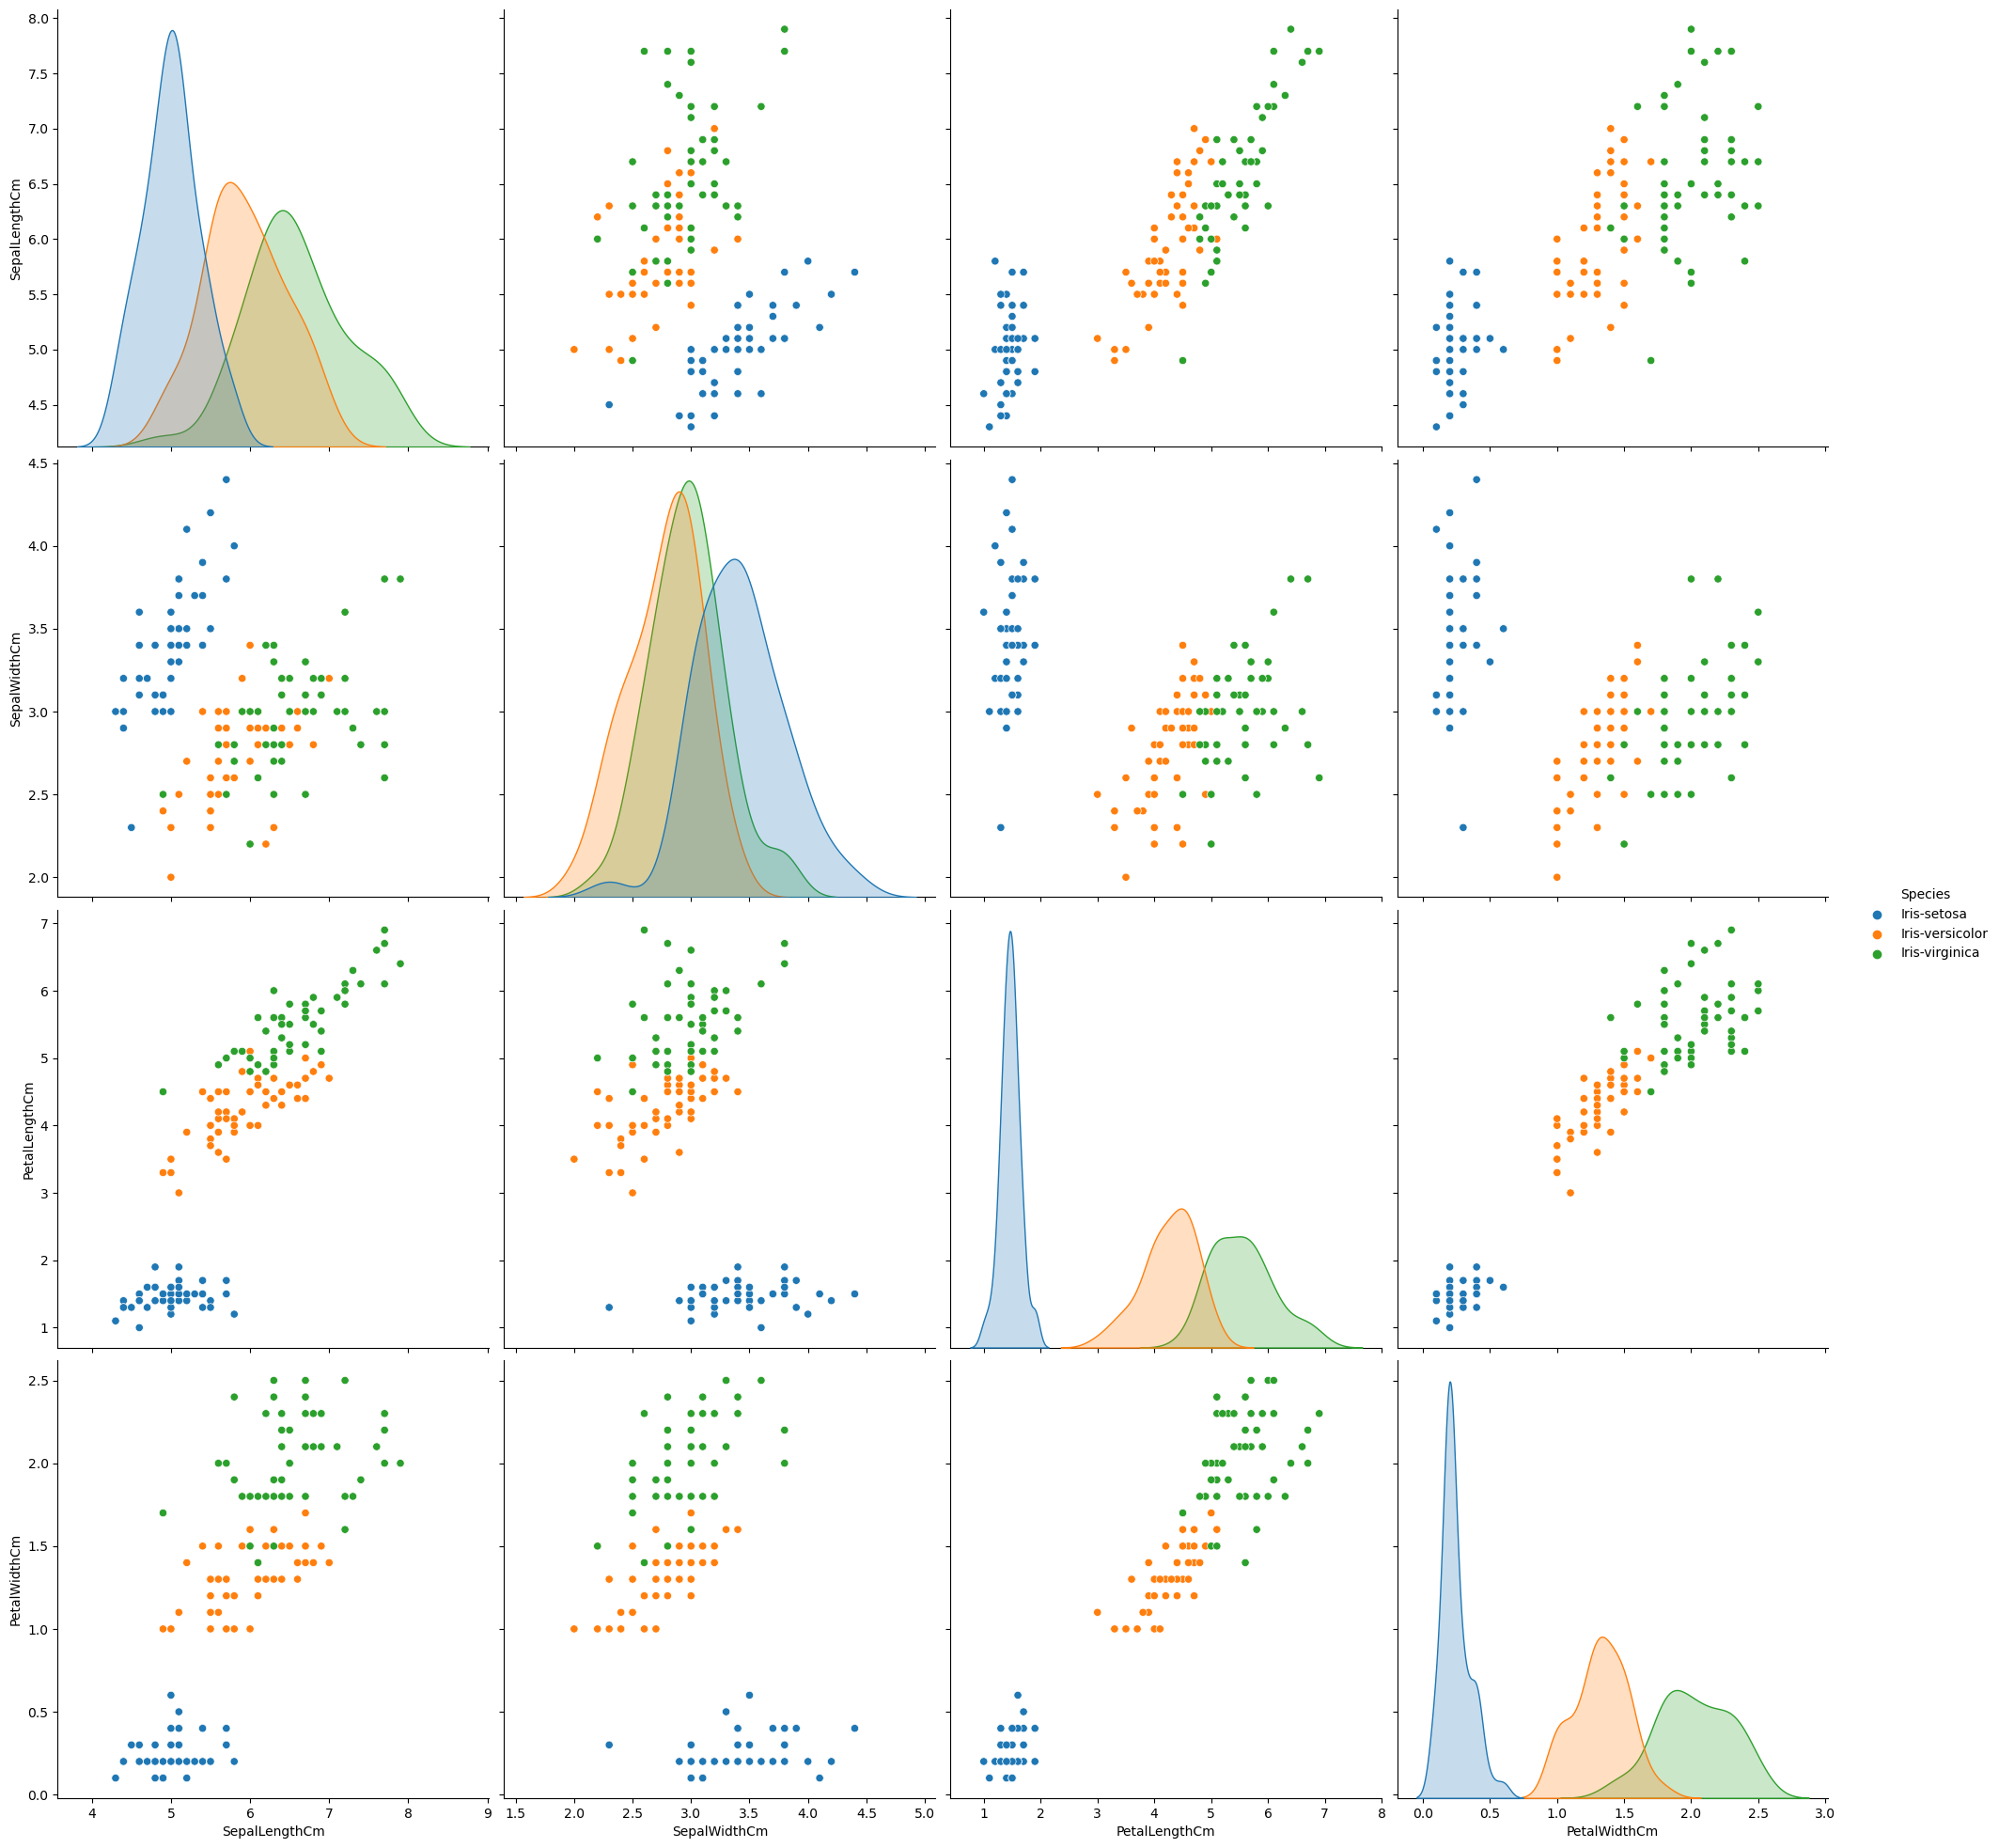

In [11]:
sns.pairplot(df, hue = "Species", height = 5)
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

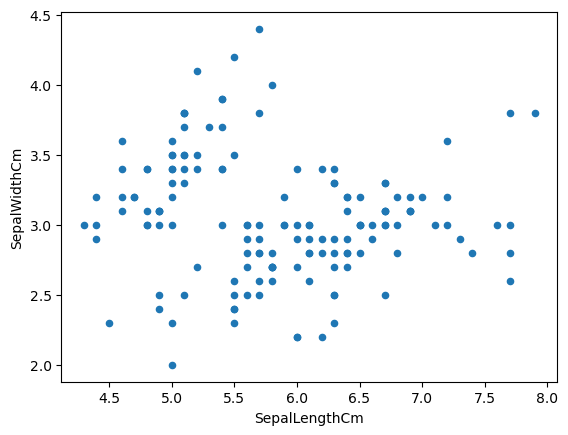

In [12]:
df.plot.scatter(x = "SepalLengthCm", y = "SepalWidthCm")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

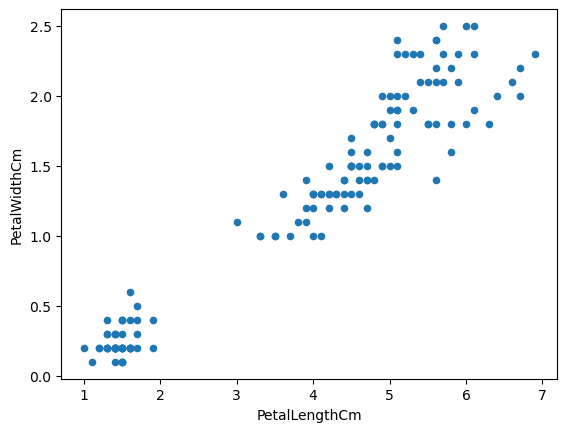

In [13]:
df.plot.scatter(x = "PetalLengthCm", y = "PetalWidthCm")

<Axes: xlabel='Species'>

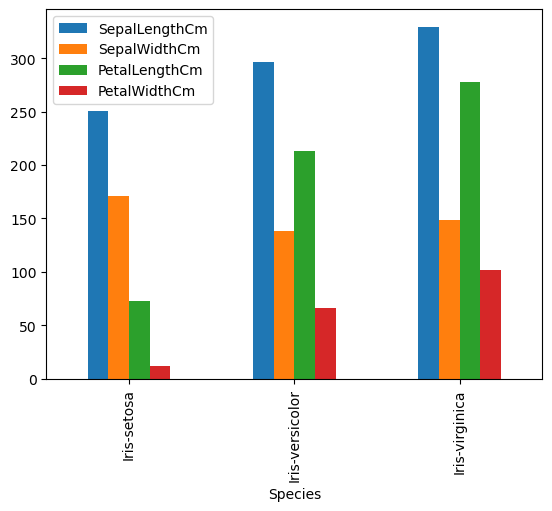

In [14]:
df.groupby(["Species"]).sum().plot(kind = "bar")

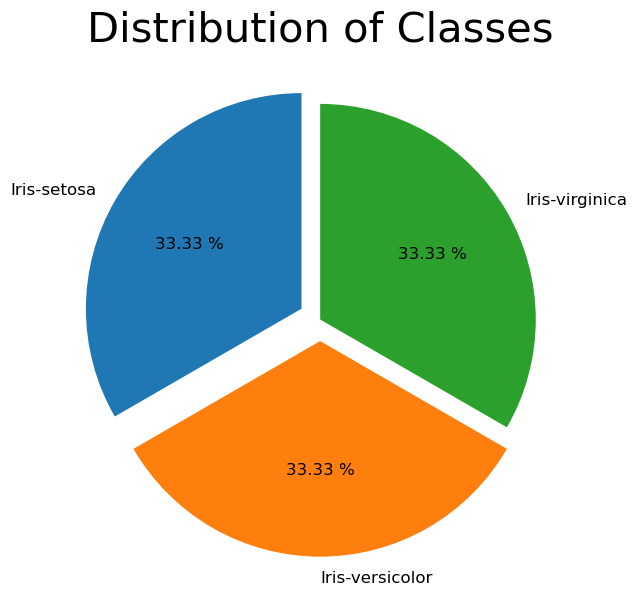

In [15]:
count_list = [(df.Species == "Iris-setosa").sum(), (df.Species == "Iris-versicolor").sum(), (df.Species == "Iris-virginica").sum()]
label_list = list(df["Species"].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {"fontsize": 12})
plt.title("Distribution of Classes", fontsize = 30)
plt.show()

In [16]:
print("The distribution of the classes is:\n", df['Species'].value_counts(), sep = "")

The distribution of the classes is:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [17]:
df2 = px.data.iris()
fig = px.scatter_3d(df2, x = "sepal_length", y = "sepal_width", z = "petal_width", color = "species")
fig.show()

In [18]:
X = df.drop(["Species"], axis = 1)
y = df["Species"]
print(X, "\n\n", y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns] 

 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Ir

## Label Encoding

In [19]:
le = LabelEncoder()
y = le.fit_transform(y)

## Scaling Data

In [20]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Viewing Correlations

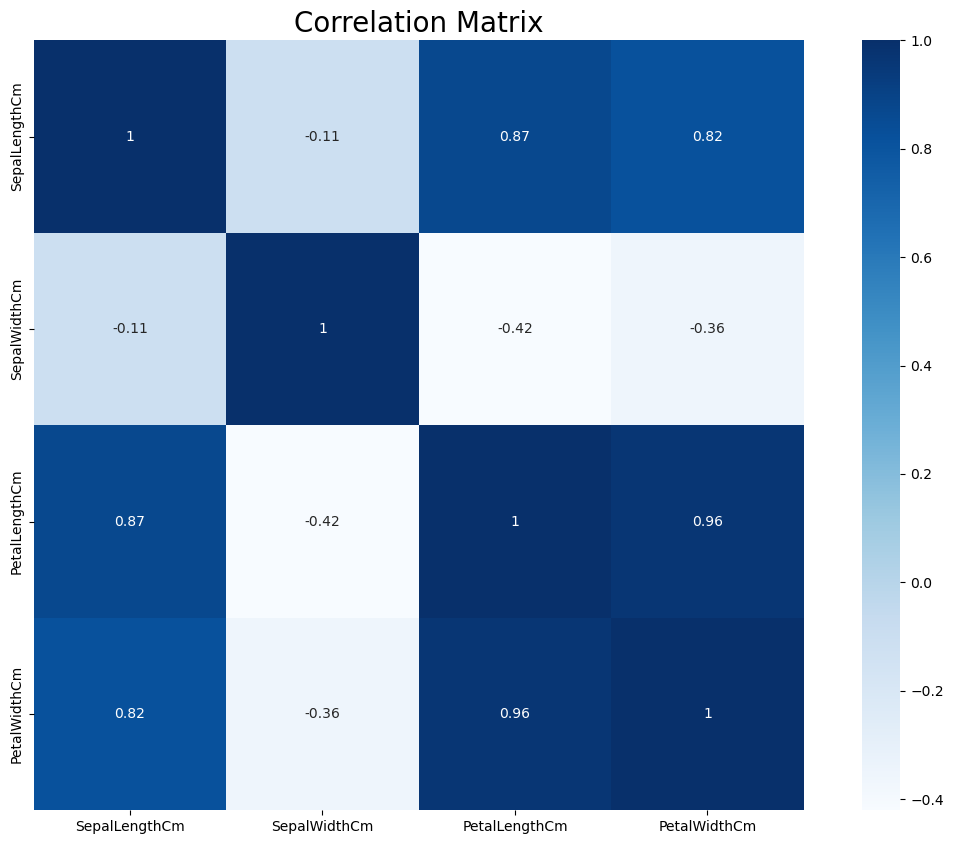

In [21]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = "Blues", square = True, annot = True)
plt.title("Correlation Matrix", size = 20)
plt.show()

## Preparation of Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

# Model Initialization

In [23]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, y_test)
print("The accuracy for KNN is: ", acc_knn * 100, "%")
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average = "macro"))

The accuracy for KNN is:  91.11111111111111 %
0.9111111111111111
0.9095022624434389


### Accuracy of the model according to the value of K

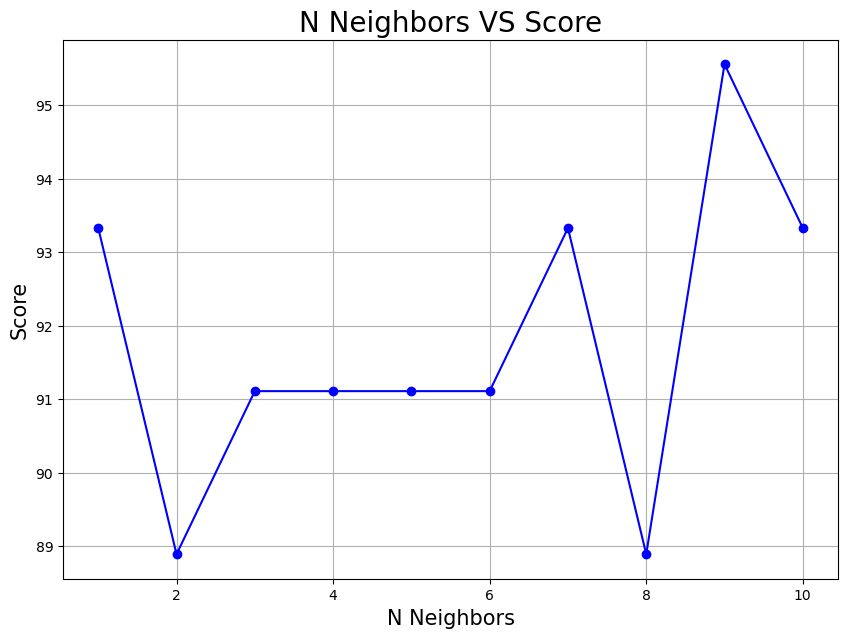

In [24]:
store_acc = []
neighbors = [i for i in range(1, 11)]
for i in range(len(neighbors)):
    knn_improved = KNeighborsClassifier(n_neighbors = neighbors[i])
    knn_improved.fit(X_train, y_train)
    y_pred = knn_improved.predict(X_test)
    acc_knn_for_diff_values = round((knn_improved.score(X_test, y_test)) * 100, 2)
    store_acc.append(acc_knn_for_diff_values)
plt.figure(figsize = (10, 7))
plt.plot(neighbors, store_acc, color = 'blue', marker = 'o')
plt.title('N Neighbors VS Score', fontsize = 20)
plt.xlabel('N Neighbors', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid(True)
plt.show()

**The score of the model varies according to the parameter k, if we fix all the other parameters we notice that k=9 gives the best precisions.**

### Finding the Best Knn Parameters with GridSearch

In [25]:
for i in [0.15,0.2,0.3] :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, stratify = y, random_state = 42)
    knn = KNeighborsClassifier()
    k_range = list(range(1, 11))
    param_grid = dict(n_neighbors=k_range)
    param_grid["metric"]=["euclidean","manhattan"]
    param_grid["weights"]=["uniform","distance"]
    
    # defining parameter range
    grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy', return_train_score=False,verbose=1)
    print ("For test_size =",i)
    
    # fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)
    
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("-"*50)  

For test_size = 0.15
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.9609375
--------------------------------------------------
For test_size = 0.2
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}
0.975
--------------------------------------------------
For test_size = 0.3
Fitting 4 folds for each of 40 candidates, totalling 160 fits
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
0.9715099715099715
--------------------------------------------------


**For a test size of 20% the best parameters of the Knn model are: 'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'**

# Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
print(y_pred)

The accuracy for Logistic Regression is: 91.11111111111111 %
[2 1 1 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 1 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]


In [27]:
#RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, ypred))
df.feature_names=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Accuracy: 0.8888888888888888


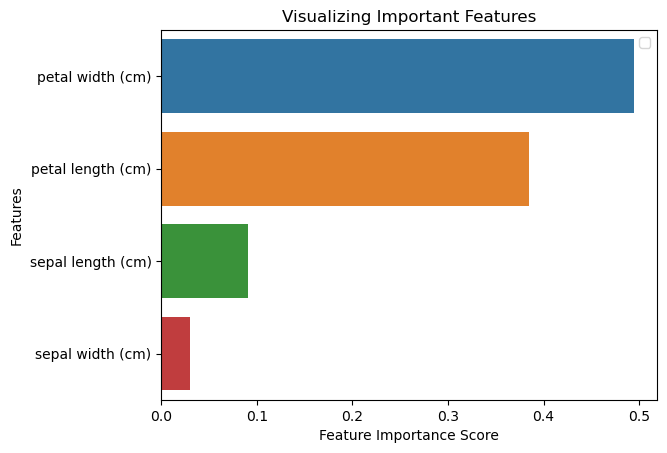

In [28]:
feature_imp = pd.Series(clf.feature_importances_,index=df.feature_names).sort_values(ascending=False)
feature_imp

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

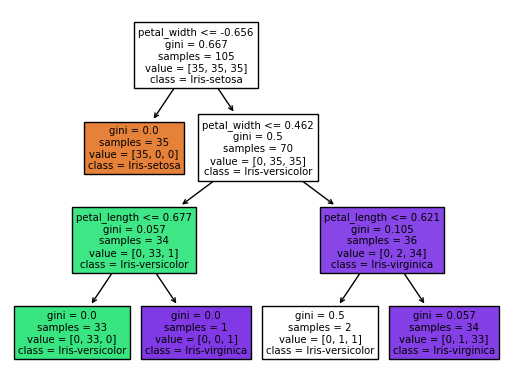

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
plot_tree(clf, feature_names= ['sepal_length','sepal_width','petal_length','petal_width'], class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],filled=True)
plt.show()

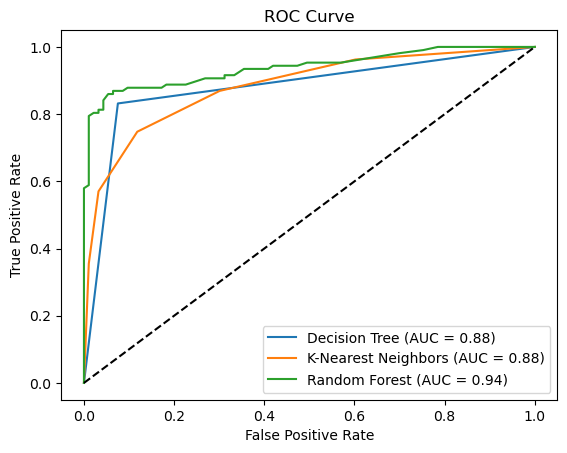

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split


data, target = make_classification(n_samples=1000, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

dt_probs = dt.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]

dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)

dt_auc = auc(dt_fpr, dt_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors (AUC = {:.2f})'.format(knn_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))

plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

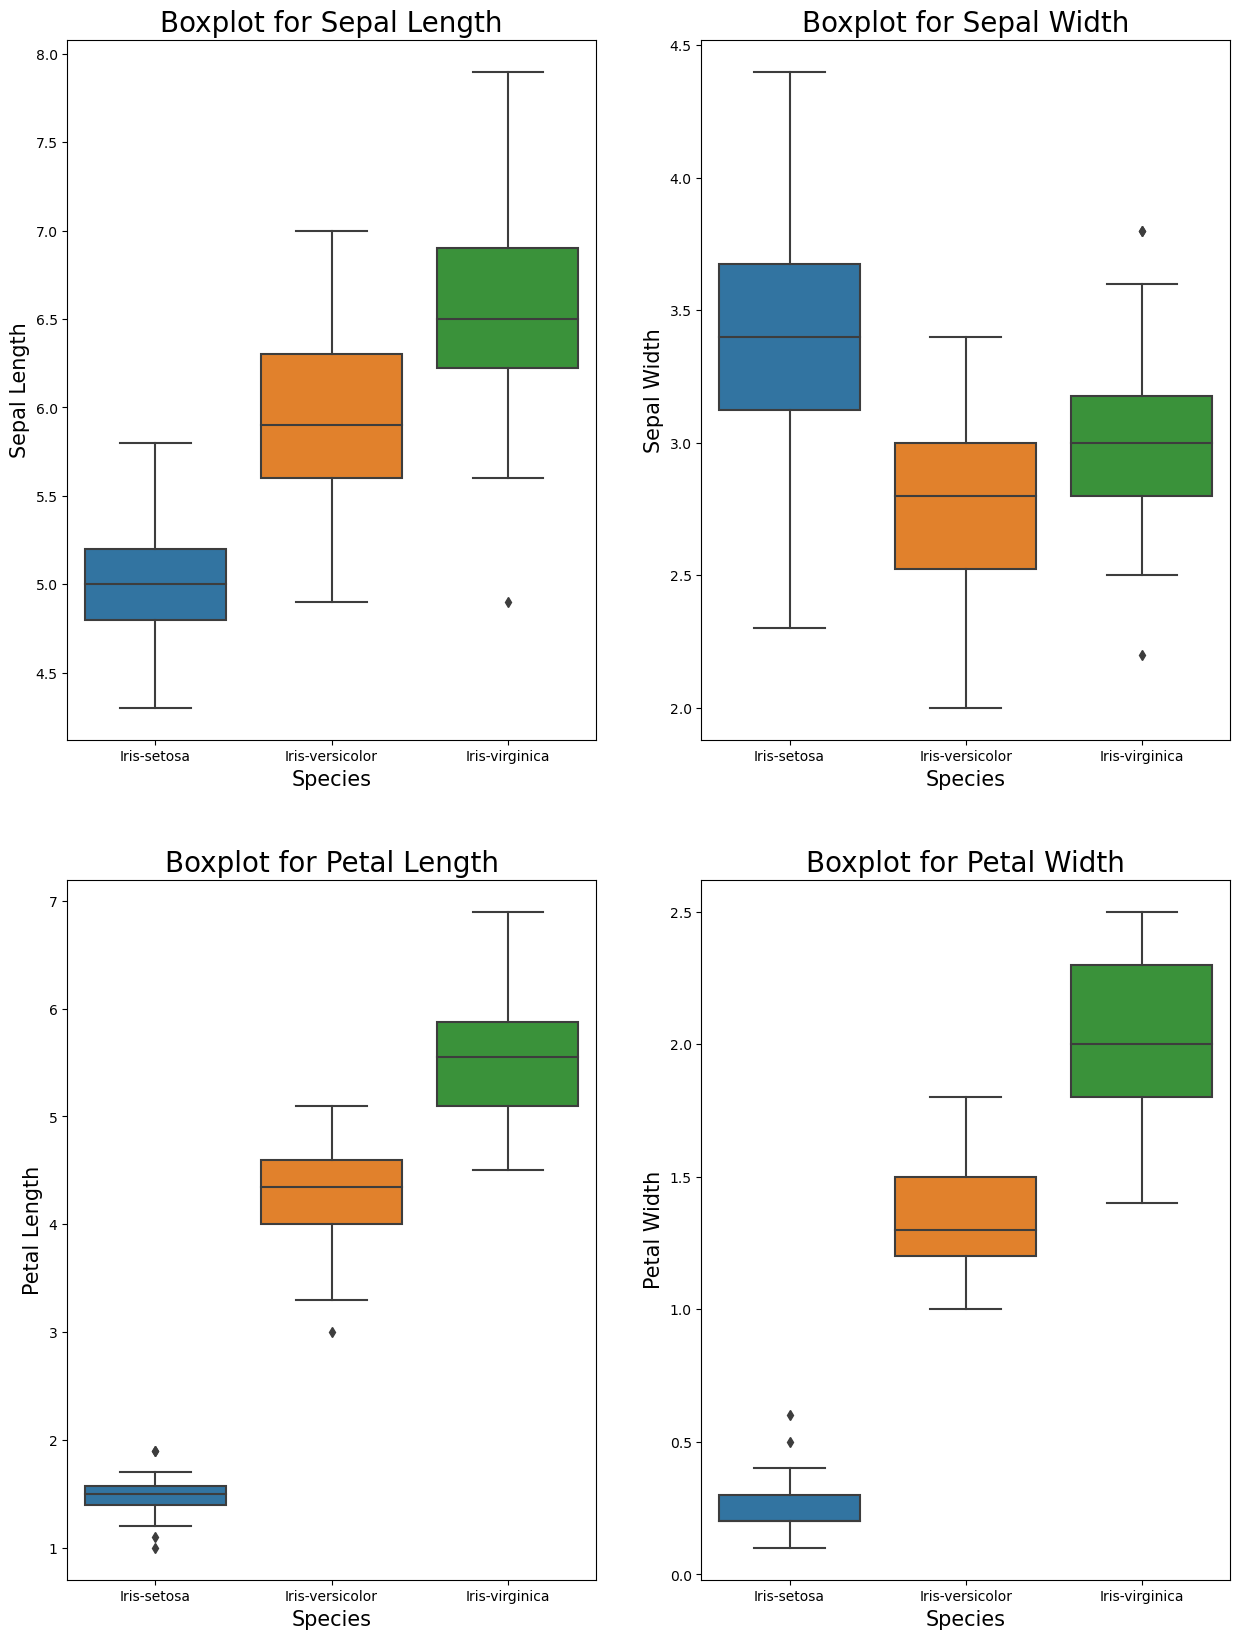

In [31]:
plt.figure(figsize=(15, 20))

def create_boxplot(feature):
    sns.boxplot(data = df, x = 'Species', y = feature)
    if(feature == 'SepalLengthCm'):
        feature = 'Sepal Length'
    if(feature == 'SepalWidthCm'):
        feature = 'Sepal Width'
    if(feature == 'PetalLengthCm'):
        feature = 'Petal Length'
    if(feature == 'PetalWidthCm'):
        feature = 'Petal Width'
    plt.title('Boxplot for ' + feature, fontsize = 20)
    plt.xlabel('Species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)
      
plt.subplot(221)
create_boxplot('SepalLengthCm')
  
plt.subplot(222)
create_boxplot('SepalWidthCm')
  
plt.subplot(223)
create_boxplot('PetalLengthCm')
  
plt.subplot(224)
create_boxplot('PetalWidthCm')
  
plt.show()

**Observations**:
 - `SepalLengthCm`: The median value for sepal length is the least for Iris-setosa and the most for Iris-virginica.
 - `SepalWidthCm`: The median value for sepal width is the least for Iris-versicolor and the largest for Iris-setosa. Based on the sepal width of the flowers it might be tough to differentiate between the 3 species.
 - `PetalLengthCm`: Visually it is very evident that Iris-setosa has the least petal length. Even though there are a few outliers all of them are less than 2 cm. Iris-versicolor has the second largest median petal length, whereas Iris-virginica has the largest median petal length.
 - `PetalWidthCm`: Similar to the petal lengths of the species, we can see that Iris-setosa has the lowest median petal width, whereas Iris-virginica has the largest median petal width.

# Classification Report
Dans cette partie on va tester la performance de plusieurs modeles par rapport à notre dataset et les évaluer selon les crtières :
> - **Precision**: Precision is defined as the ratio of true positives to the sum of true and false positives.
> - **Recall**: Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
> - **F1 Score**: The F1 Score is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
> - **Support**: Support is the number of actual occurrences of the classes in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process. 

In [32]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()    

# Logistic Regression
Logistic regression, despite its name, is a classification model rather than regression model. It is a process of modeling the probability of a discrete outcome given input variables. 

The accuracy for Logistic Regression is: 85.5 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



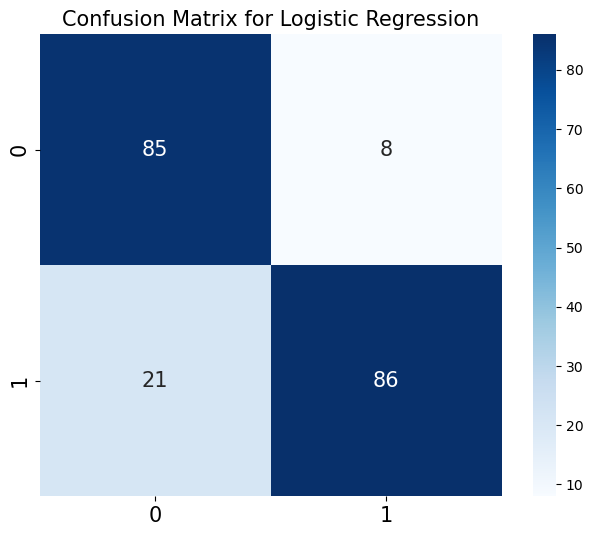

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = lr.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_lr * 100, "%")
generate_results(lr, y_pred, 'Logistic Regression')

# KNN
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc_knn = knn.score(X_test, knn_pred)
print("The Accuracy for KNN is: ", acc_knn * 100, "%")

The Accuracy for KNN is:  100.0 %


# KNN Model Performance
On the default KNN model we are getting a score of 96.67%. The default value for `n_neighbors` is 5 in KNN. Lets look at the score for different values of `n_neighbors` and select the value that gives us the best results.

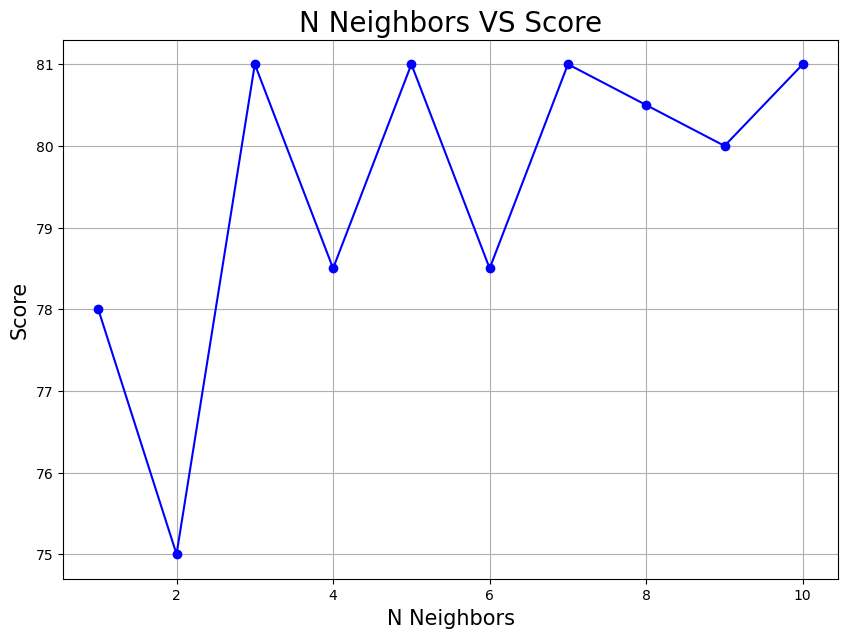

In [35]:
store_acc = []
neighbors = [i for i in range(1, 11)]
for i in range(len(neighbors)):
    knn_improved = KNeighborsClassifier(n_neighbors = neighbors[i])
    knn_improved.fit(X_train, y_train)
    y_pred = knn_improved.predict(X_test)
    acc_knn_for_diff_values = round((knn_improved.score(X_test, y_test)) * 100, 2)
    store_acc.append(acc_knn_for_diff_values)
plt.figure(figsize = (10, 7))
plt.plot(neighbors, store_acc, color = 'blue', marker = 'o')
plt.title('N Neighbors VS Score', fontsize = 20)
plt.xlabel('N Neighbors', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.grid(True)
plt.show()

**From the graph above, we can clearly observe that for all values ​​of `n_neighbors` greater than 6, the accuracy is 100%. Let's select the smallest value of `n_neighbors` that gives us the highest precision which is 7.**

The accuracy for KNN is: 81.0 %

The classification report for KNN (n_neighbors = 7) is:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        93
           1       0.87      0.76      0.81       107

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



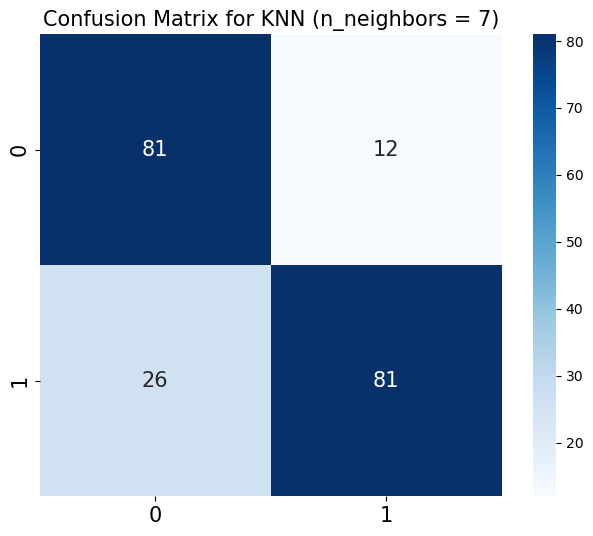

In [36]:
knn_improved = KNeighborsClassifier(n_neighbors = 7)
knn_improved.fit(X_train, y_train)
y_pred = knn_improved.predict(X_test)
acc_knn_imp = knn_improved.score(X_test, y_test)
print("The accuracy for KNN is:", acc_knn_imp * 100, "%")
generate_results(knn_improved, y_pred, 'KNN (n_neighbors = 7)')

# Gaussian Naive Bayes
This is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed.

The accuracy for SVC is: 84.5 %

The classification report for Support Vector Classifier is:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



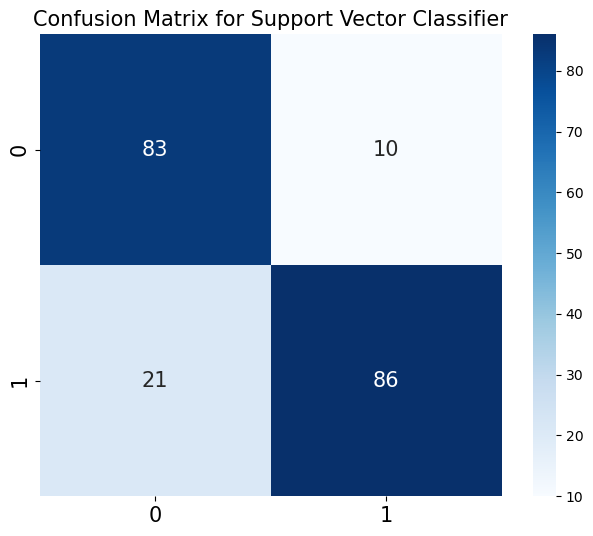

In [37]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
print('The accuracy for SVC is:', acc_svc * 100, '%')
generate_results(svc, y_pred, 'Support Vector Classifier')

# Quadratic Discriminant Analysis
QDA is a variant of LDA (Linear Discriminant Analysis) in which an individual covariance matrix is estimated for every class of observations. QDA is particularly useful if there is prior knowledge that individual classes exhibit distinct covariances.

The accuracy for Quadratic Discriminant Analysis is: 66.0 %

The classification report for QDA is:
              precision    recall  f1-score   support

           0       0.74      0.42      0.53        93
           1       0.63      0.87      0.73       107

    accuracy                           0.66       200
   macro avg       0.68      0.64      0.63       200
weighted avg       0.68      0.66      0.64       200



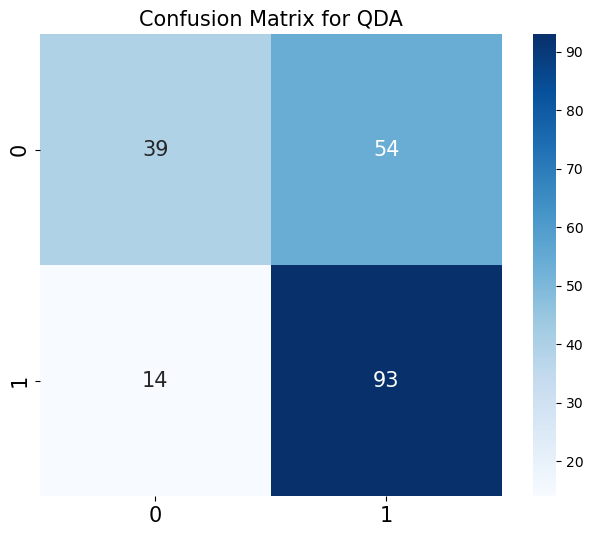

In [38]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
acc_qda = qda.score(X_test, y_test)
print('The accuracy for Quadratic Discriminant Analysis is:', acc_qda * 100, '%')
generate_results(qda, y_pred, 'QDA')

# Decision Tree Classifier
A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions. On each step or node of a decision tree, used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the fullest purity.

The accuracy of the Decision Tree Classifier is: 86.0 %

The classification report for Decision Tree Classifier is:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        93
           1       0.91      0.82      0.86       107

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



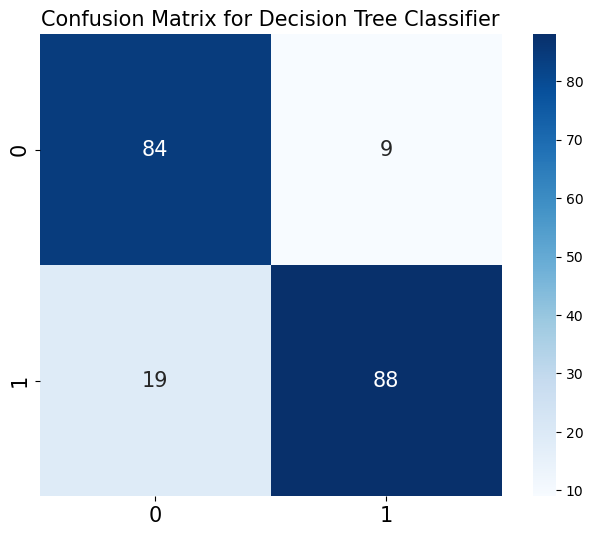

In [39]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_dtc = dtc.score(X_test, y_test)
print('The accuracy of the Decision Tree Classifier is:', acc_dtc * 100, '%')
generate_results(dtc, y_pred, 'Decision Tree Classifier')

# Random Forest Classifier
The term “Random Forest Classifier” refers to the classification algorithm made up of several decision trees. The algorithm uses randomness to build each individual tree to promote uncorrelated forests, which then uses the forest's predictive powers to make accurate decisions.

The accuracy of the Random Forest Classifier is: 89.0 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        93
           1       0.95      0.84      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.89      0.89       200



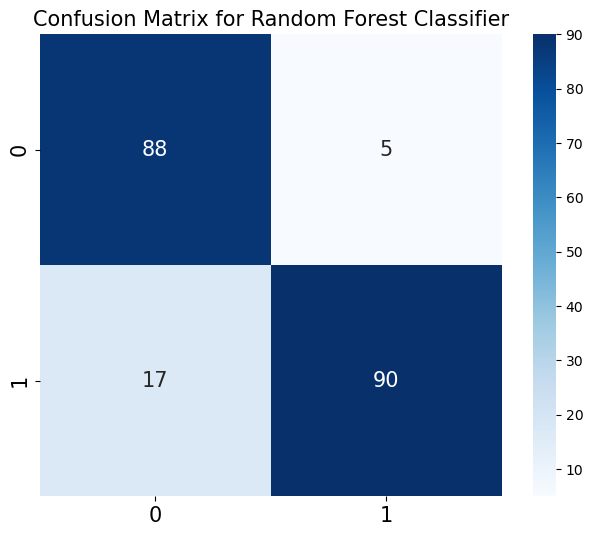

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

# Ada Boost Classifier
It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.

The accuracy for Ada Boost Classifier is: 87.0 %

The classification report for Ada Boost Classifier is:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        93
           1       0.91      0.84      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



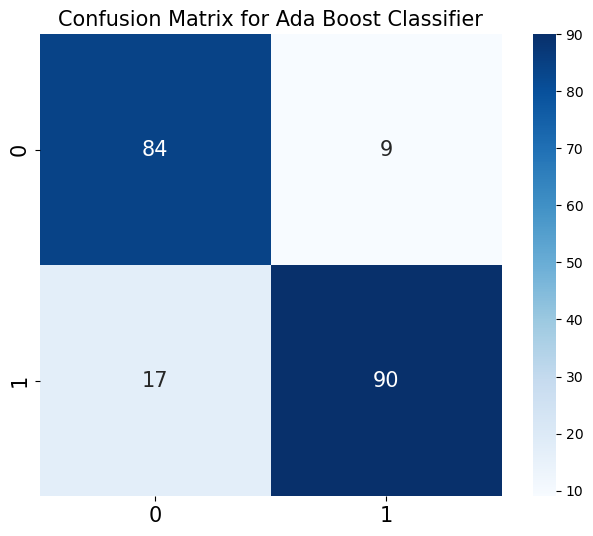

In [41]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc_abc = abc.score(X_test, y_test)
print('The accuracy for Ada Boost Classifier is:', acc_abc * 100, '%')
generate_results(abc, y_pred, 'Ada Boost Classifier')

# Extra Trees Classifier
This is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result.

The accuracy for Etra Trees Classifier is: 88.5 %

The classification report for Extra Tress Classifier is:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        93
           1       0.94      0.84      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



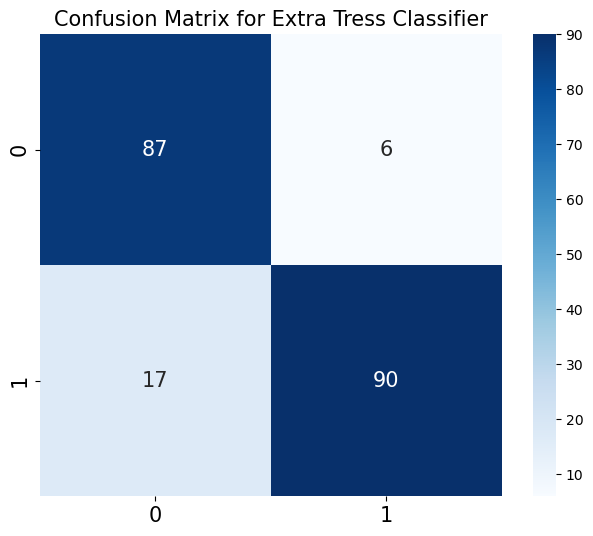

In [42]:
etc = ExtraTreesClassifier(random_state = 0)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
acc_etc = etc.score(X_test, y_test)
print('The accuracy for Etra Trees Classifier is:', acc_etc * 100, '%')
generate_results(etc, y_pred, 'Extra Tress Classifier')

# Bagging Classifier
Bagging classifier is an ensemble technique that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions to form a final prediction.

The accuracy for Bagging Classifier is: 89.5 %

The classification report for Bagging Classifier is:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        93
           1       0.96      0.84      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



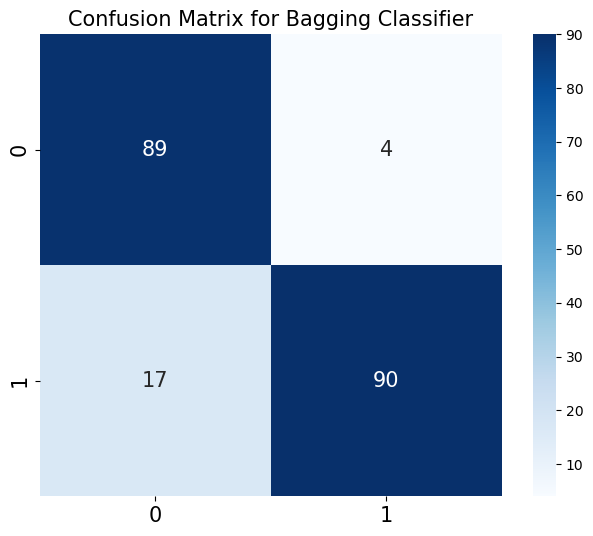

In [43]:
bc = BaggingClassifier()
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_bc = bc.score(X_test, y_test)
print('The accuracy for Bagging Classifier is:', acc_bc * 100, '%')
generate_results(bc, y_pred, 'Bagging Classifier')

# Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.

The accuracy for the Gradient Boosting Classifier is: 91.0 %

The classification report for Gradient Boosting Classifier is:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        93
           1       0.97      0.86      0.91       107

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.91      0.91       200



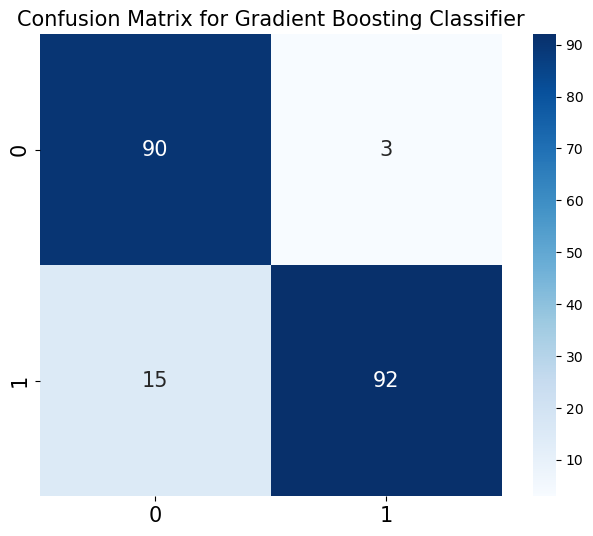

In [44]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc_gbc = gbc.score(X_test, y_test)
print('The accuracy for the Gradient Boosting Classifier is:', acc_gbc * 100, '%')
generate_results(gbc, y_pred, 'Gradient Boosting Classifier')

# XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost provides a highly efficient implementation of the stochastic gradient boosting algorithm and access to a suite of model hyperparameters designed to provide control over the model training process.

The accuracy for XGB Classifier is: 89.0 %

The classification report for XGB Classifier is:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        93
           1       0.93      0.86      0.89       107

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



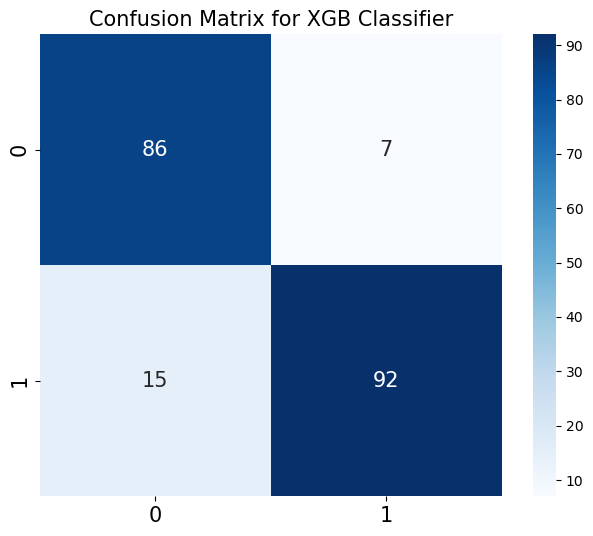

In [45]:
xgbc = XGBClassifier(n_jobs = -1, silent = True, verbosity = 0)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
acc_xgbc = xgbc.score(X_test, y_test)
print('The accuracy for XGB Classifier is:', acc_xgbc * 100, '%')
generate_results(xgbc, y_pred, 'XGB Classifier')

# Final Results

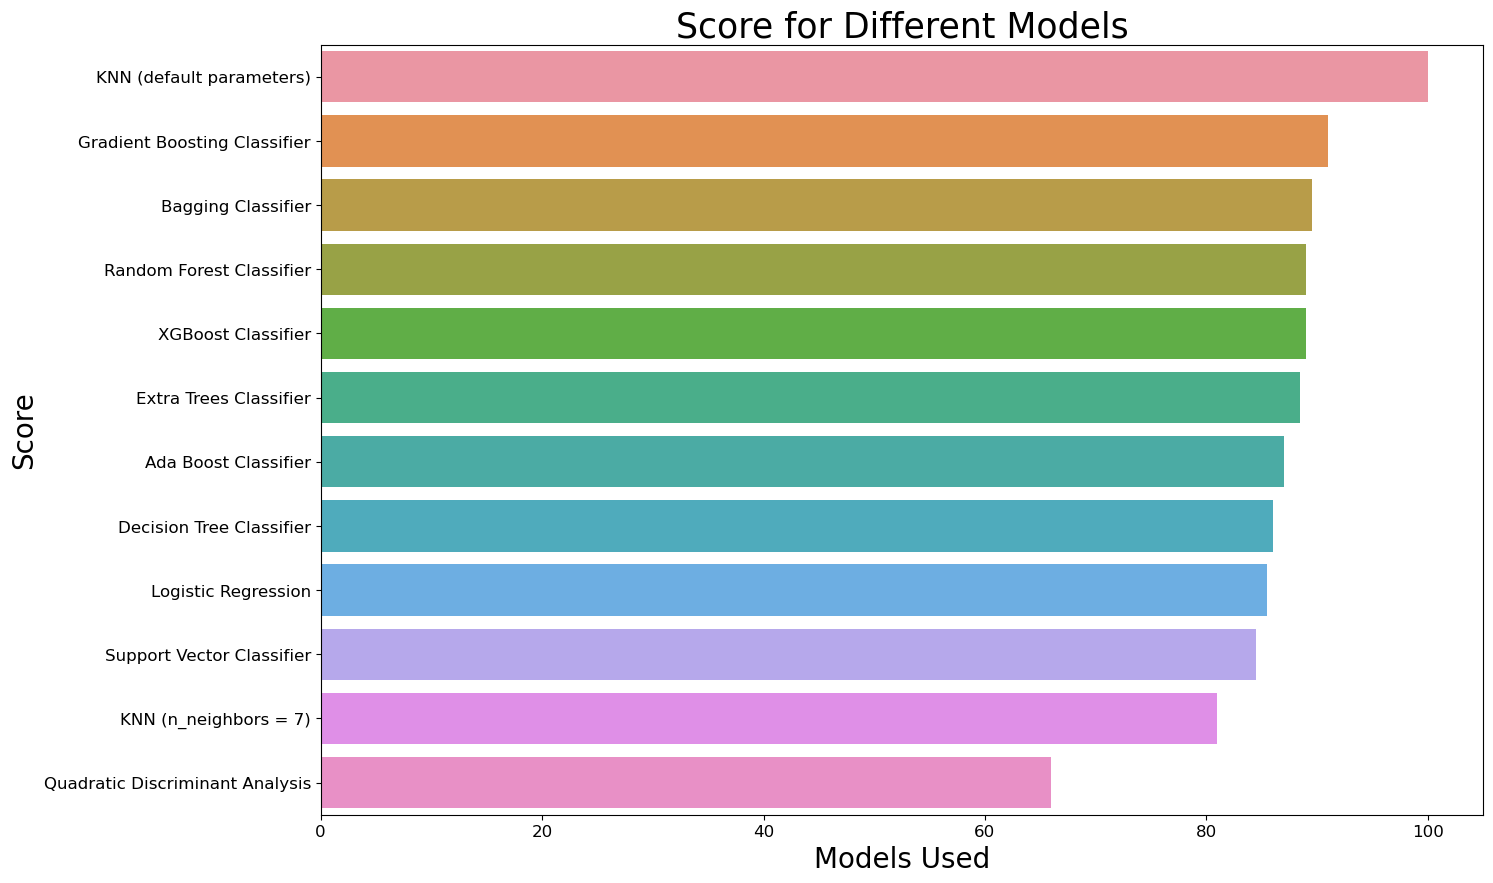

In [46]:
data = {'Logistic Regression': acc_lr * 100, 
        'KNN (default parameters)': acc_knn * 100, 
        'KNN (n_neighbors = 7)': acc_knn_imp * 100, 
        'Support Vector Classifier': acc_svc * 100, 
        'Quadratic Discriminant Analysis': acc_qda * 100, 
        'Decision Tree Classifier': acc_dtc * 100, 
        'Random Forest Classifier': acc_rfc * 100,
        'Ada Boost Classifier': acc_abc * 100, 
        'Extra Trees Classifier': acc_etc * 100,
        'Bagging Classifier': acc_bc * 100, 
        'Gradient Boosting Classifier': acc_gbc * 100,
        'XGBoost Classifier': acc_xgbc * 100}
data = dict(sorted(data.items(), key = lambda x: x[1], reverse = True))
models = list(data.keys())
score = list(data.values())
fig = plt.figure(figsize = (15, 10))
sns.barplot(x = score, y = models)
plt.xlabel("Models Used", size = 20)
plt.xticks(size = 12)
plt.ylabel("Score", size = 20)
plt.yticks(size = 12)
plt.title("Score for Different Models", size = 25)
plt.show()

# Thank you!